### Homework 3.4 - Testing out filters

We are testing out the following filters:

- Low pass filter
- High pass filter
- Band filter
- Guassian blur filter

Pick an image of your choice and apply those filters on it.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

I perform a fast fourier transform before shifting the image.. \
Then, I applied the following filters into the image respectively. \
After I applied the filter, I shift the filtered image and inverse fast fourier transform back to get the image with that filter.

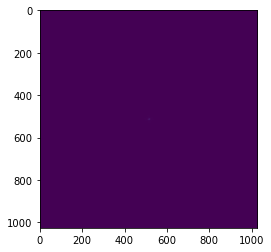

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
from scipy import misc, fft
%matplotlib inline

image = mpimg.imread('images/unknown.png')

grayim = image[:,:,0]
norm = np.sqrt(grayim.shape[0] * grayim.shape[1])

image_D1 = fft.fft2(grayim)/norm
image_D2 = fft.fftshift(image_D1)

abs_image = np.abs(image_D2)
plt.imshow(abs_image)

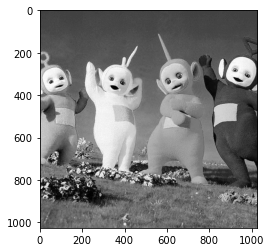

In [2]:
plt.imshow(grayim, cmap=plt.get_cmap('gray'))

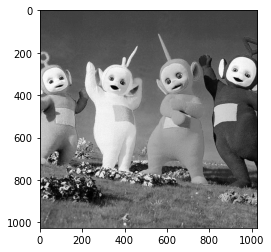

In [3]:
shift_img = fft.fftshift(image_D2)
img_inv = fft.ifft2(shift_img) 
image_inv = np.abs(img_inv)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))

### Low pass filter

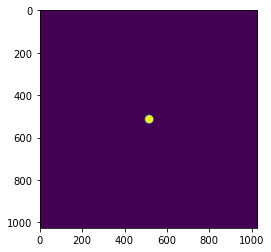

In [4]:
n = 1027
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 20

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M = X**2 + Y**2 < R**2

D1 = fft.fft2(M)/n
D2 = fft.fftshift(D1)

D3 = fft.fft2(D1)/n
#print np.abs(D3)[:,50]
plt.imshow(np.abs(D3))

In [5]:
filtered_img = image_D2 * M
img_shifted = fft.fftshift(filtered_img)
img_inv = fft.ifft2(img_shifted) 

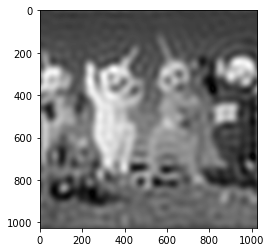

In [6]:
# low pass filter

image_inv = np.abs(img_inv)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))

### High pass filter

the mask is similar to low pass but swap the sign.

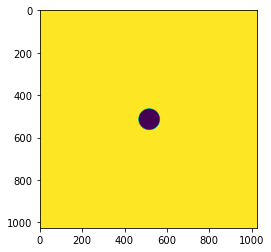

In [7]:
n = 1027
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R = 50

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M = X**2 + Y**2 > R**2

D1 = fft.fft2(M)/n
D2 = fft.fftshift(D1)

D3 = fft.fft2(D1)/n
#print np.abs(D3)[:,50]
plt.imshow(np.abs(D3))

In [8]:
filtered_img = image_D2 * M
img_shifted = fft.fftshift(filtered_img)
img_inv = fft.ifft2(img_shifted) 

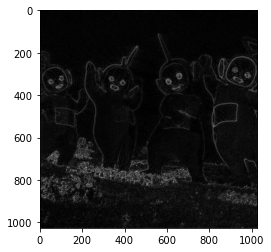

In [9]:
# high pass filter

image_inv = np.abs(img_inv)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))

### Band filter

the mask will look like a ring.

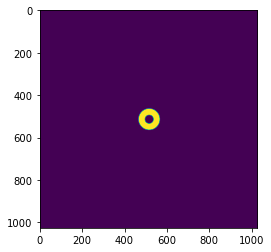

In [10]:
n = 1027
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

R1 = 20
R2 = 50

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M1 = X**2 + Y**2 < R1**2
M2 = X**2 + Y**2 < R2**2
M = np.logical_xor(M1, M2)

D1 = fft.fft2(M)/n
D2 = fft.fftshift(D1)

D3 = fft.fft2(D1)/n
#print np.abs(D3)[:,50]
plt.imshow(np.abs(D3))

In [11]:
filtered_img = image_D2 * M
img_shifted = fft.fftshift(filtered_img)
img_inv = fft.ifft2(img_shifted) 

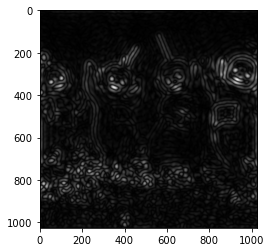

In [12]:
# band filter

image_inv = np.abs(img_inv)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))

### Guassian blur filter

In [13]:
def guassian(x, y, sigma):
    return 1/(2*np.pi*sigma**2) * np.exp(-(x**2+y**2)/(2*sigma**2))

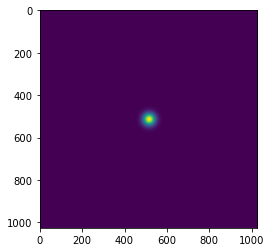

In [14]:
n = 1027
I = np.arange(1, n)
x = I - n / 2
y = n / 2 - I

X = x[:, np.newaxis]
Y = y[np.newaxis, :]

M = guassian(X, Y, 20)

D1 = fft.fft2(M)/n
D2 = fft.fftshift(D1)

D3 = fft.fft2(D1)/n
#print np.abs(D3)[:,50]
plt.imshow(np.abs(D3))

In [15]:
filtered_img = image_D2 * M
img_shifted = fft.fftshift(filtered_img)
img_inv = fft.ifft2(img_shifted) 

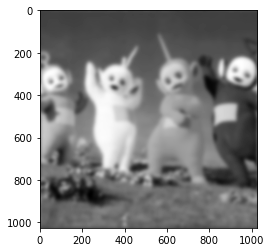

In [16]:
# guassian blur filter

image_inv = np.abs(img_inv)
image_inv -= image_inv.min()
image_inv *= 255.0/image_inv.max()
image_inv = image_inv.astype(dtype='int64')
plt.imshow(image_inv, cmap=plt.get_cmap('gray'))